In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(267, 8)

In [3]:
df = df.sort_values(["연번"], ascending=False)

In [4]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,267,확인중,3.16.,여('67),동작구,-,확인중,확인중
1,266,8271,3.16.,남('94),영등포구,"모로코, 프랑스, 오스트리아",해외접촉 추정,확인중
2,265,확인중,3.16.,남('86),관악구,-,확인중,서울의료원
3,264,8245,3.16.,남('78),강서구,-,타시도 확진자 접촉,서울의료원
4,263,8268,3.16.,남('01),구로구,-,#8196 접촉,서울의료원


In [5]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
262,5,9,1.31.,여(‵92),성북구,-,#5 접촉,서울의료원(퇴원)
263,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
264,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원)
265,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
266,1,2,1.23.,남(‵64),강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")
plt.rc("axes", unicode_minus=False)

### 시각화 선명하게 설정하기

In [7]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

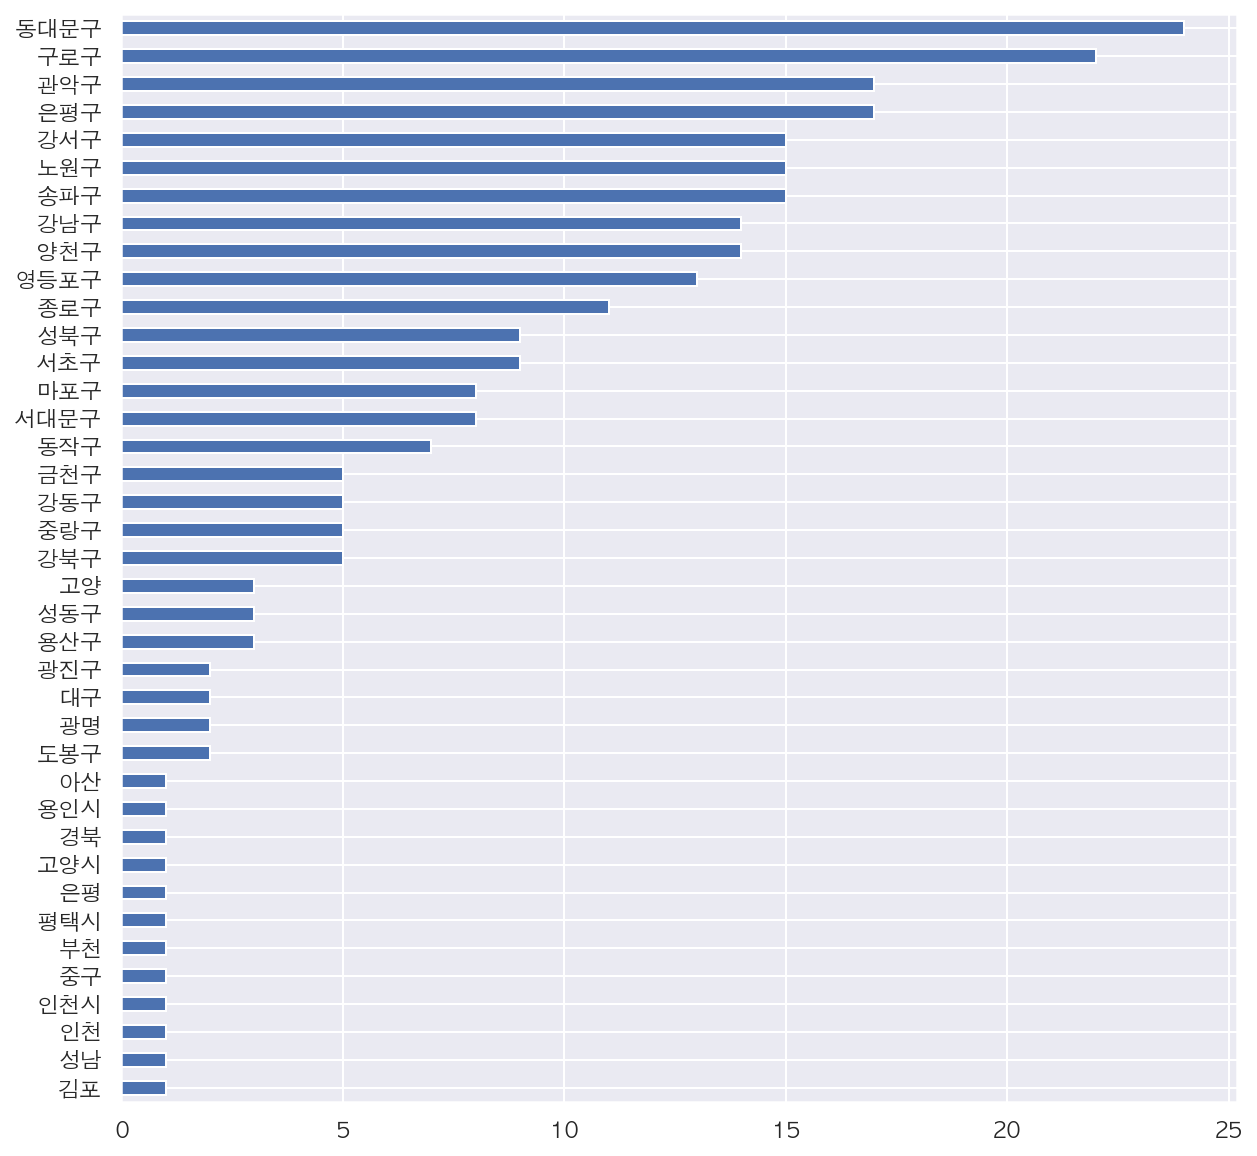

In [8]:
df["거주지"].value_counts().sort_values().plot.barh(figsize=(10, 10))

## 조치사항

In [9]:
df["조치사항"].value_counts()

서울의료원          81
서남병원           60
보라매병원          26
서울의료원(퇴원)      16
국립중앙의료원(퇴원)    10
서울대학교병원(퇴원)    10
서북병원           10
국립중앙의료원         9
보라매병원(퇴원)       4
타시도이관           4
서남병원(퇴원)        3
삼육서울병원          3
상계백병원           3
중앙대학교병원(퇴원)     3
한일병원(퇴원)        2
순천향서울병원         2
타시도이관(퇴원)       2
한양대학교병원(퇴원)     2
한일병원            2
상계백병원(퇴원)       2
타시도 이관          2
중앙대학교병원         2
확인중             2
서울아산병원          1
강남세브란스병원        1
고대구로병원(퇴원)      1
고대구로병원          1
서울대학교병원         1
서울성모병원          1
서울백병원           1
Name: 조치사항, dtype: int64

In [10]:
df["확진일"].value_counts()

3.10.     46
3.9.      26
3.11.     17
2.25.     15
3.16.     13
2.27.     12
3.12.     12
3.8.      10
2.26.     10
3.13.      9
3.14.      8
2.28.      8
3.7.       7
3.6.       7
3.15.      6
3.1.       6
3.2.       6
2.29.      5
3.4.       5
2.20.      5
2.22.      4
2.23.      4
2.24.      3
1.30.      3
1.31.      3
2.21.      2
2.5.       2
2.16.      2
2.19.      2
1.23.      1
3.3.       1
2.6.       1
2.7.       1
2.25       1
2.27       1
2.2.       1
2.24..     1
3.5.       1
Name: 확진일, dtype: int64

In [11]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-03-16
1   2020-03-16
2   2020-03-16
3   2020-03-16
4   2020-03-16
Name: 확진일자, dtype: datetime64[ns]

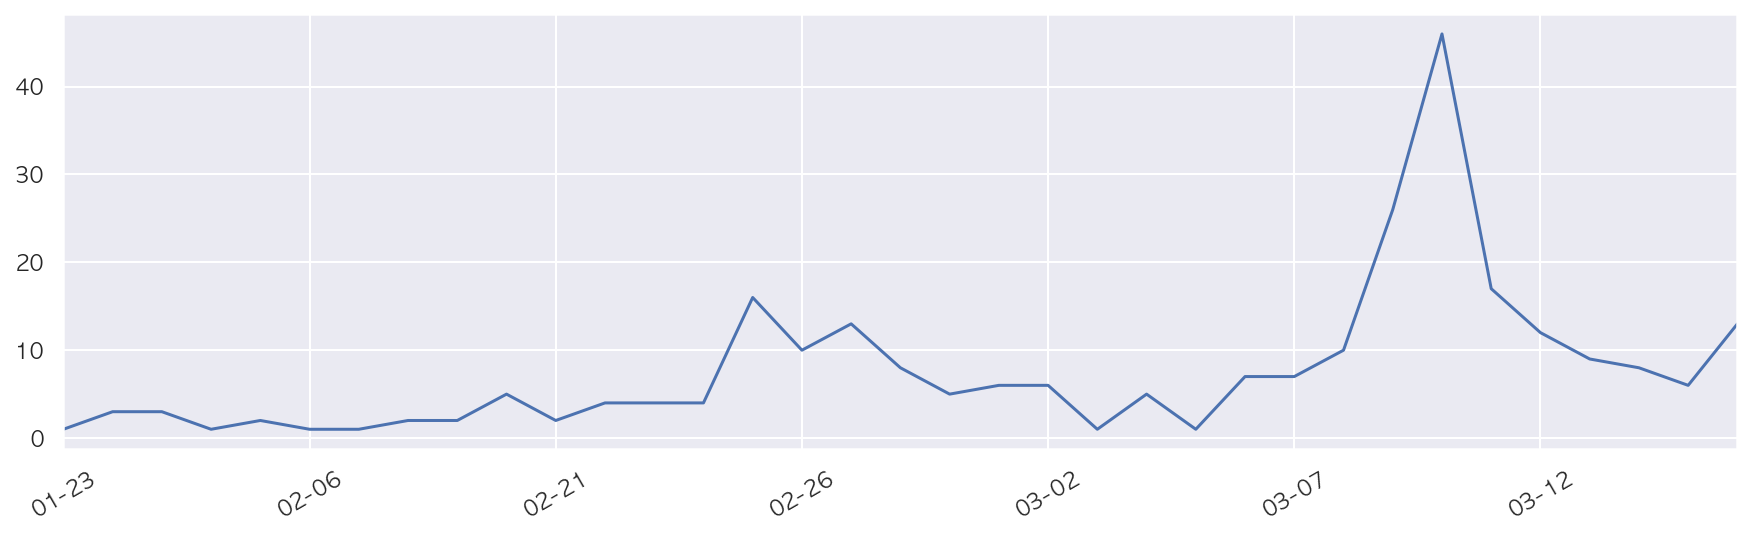

In [12]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

In [13]:
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[0]

1

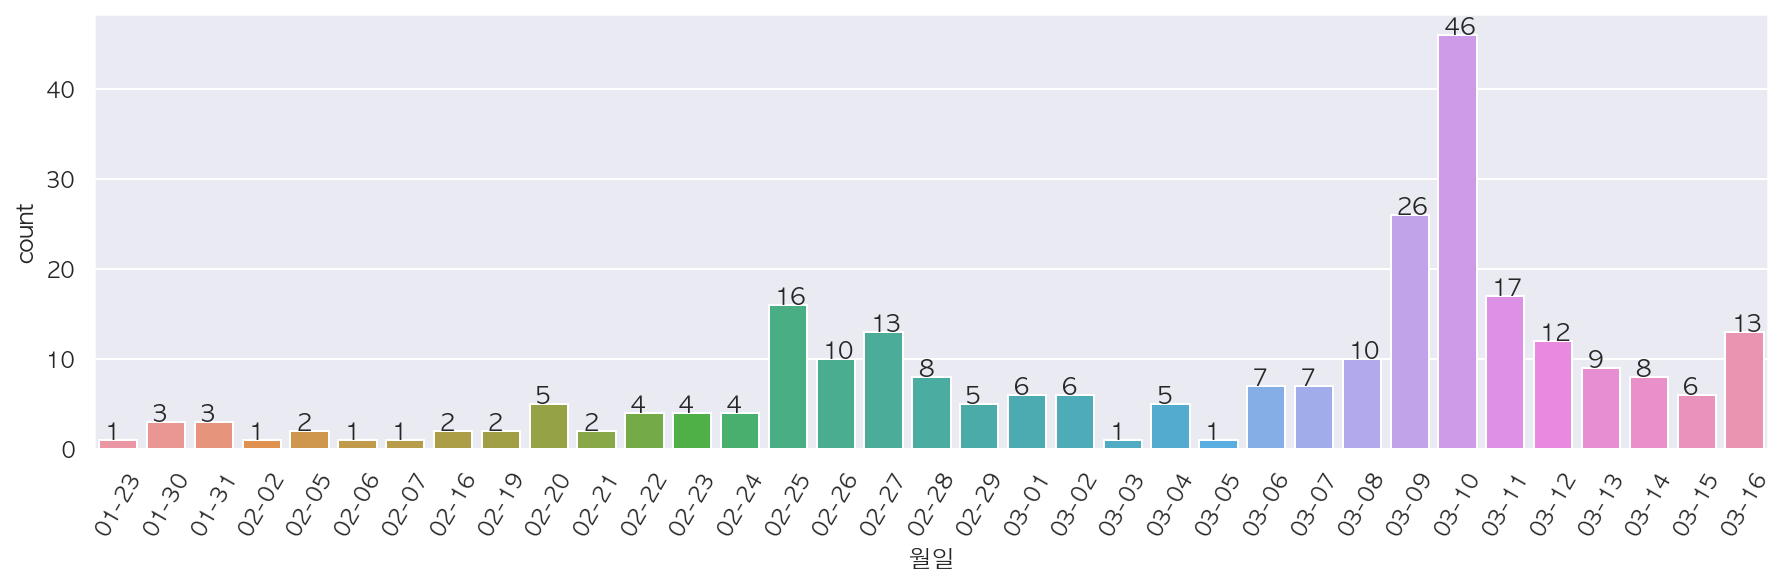

In [14]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
g = sns.countplot(data=df.sort_values(by="월일"), x="월일")

for i in range(len(day_count)):
    g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 누적확진

In [15]:
cum = df.groupby(["확진일자"])["연번"].count()
cum

확진일자
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
2020-02-06     1
2020-02-07     1
2020-02-16     2
2020-02-19     2
2020-02-20     5
2020-02-21     2
2020-02-22     4
2020-02-23     4
2020-02-24     4
2020-02-25    16
2020-02-26    10
2020-02-27    13
2020-02-28     8
2020-02-29     5
2020-03-01     6
2020-03-02     6
2020-03-03     1
2020-03-04     5
2020-03-05     1
2020-03-06     7
2020-03-07     7
2020-03-08    10
2020-03-09    26
2020-03-10    46
2020-03-11    17
2020-03-12    12
2020-03-13     9
2020-03-14     8
2020-03-15     6
2020-03-16    13
Name: 연번, dtype: int64

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [16]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-03-16 00:00:00'))

In [17]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16'],
              dtype='datetime64[n

In [18]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [19]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-23,1.0
1,2020-01-24,NaN
2,2020-01-25,NaN
3,2020-01-26,NaN
4,2020-01-27,NaN


## 누적 확진자 수 구하기

In [20]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-23,1.0,1.0
1,2020-01-24,NaN,1.0
2,2020-01-25,NaN,1.0
3,2020-01-26,NaN,1.0
4,2020-01-27,NaN,1.0
5,2020-01-28,NaN,1.0
6,2020-01-29,NaN,1.0
7,2020-01-30,3.0,4.0
8,2020-01-31,3.0,7.0
9,2020-02-01,NaN,7.0


In [21]:
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-23
1    01-24
2    01-25
3    01-26
4    01-27
Name: 일자, dtype: object

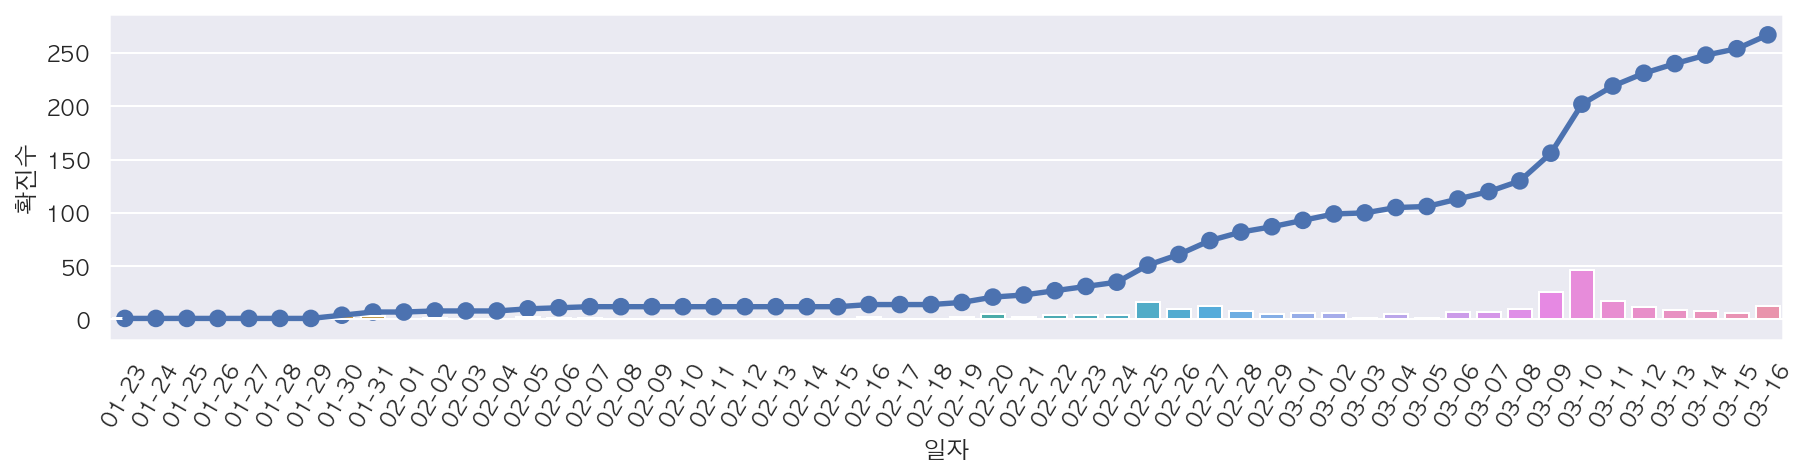

In [22]:
plt.figure(figsize=(15, 3))
plt.xticks(rotation=60)
sns.pointplot(data=all_day, x="일자", y="누적확진")
sns.barplot(data=all_day, x="일자", y="확진수")

In [23]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-23,1.0,1.0,01-23,1,3
1,2020-01-24,NaN,1.0,01-24,1,4
2,2020-01-25,NaN,1.0,01-25,1,5
3,2020-01-26,NaN,1.0,01-26,1,6
4,2020-01-27,NaN,1.0,01-27,1,0


## 요일별 확진 수 

In [24]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum().unstack()
all_day_week.style.background_gradient(cmap='PuBu')

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,4,3,0,0
2,4,16,14,19,11,9,7
3,45,47,22,13,16,15,22


## 접촉력

In [25]:
df["접촉력"].value_counts()

구로구 콜센터 관련           54
콜센터직원 접촉             27
확인중                  26
타시도 확진자 접촉           19
동대문구 관련(교회,PC방)      16
해외 접촉                15
성동구 주상복합 관리사무소 관련    13
동대문구 관련(요양보호사)        8
해외접촉                  7
은평성모병원관련              7
은평성모병원 관련             6
대구 방문                 5
-                     4
#780 접촉               3
대구 확진자 접촉             3
#6 접촉                 3
신천지 추정                2
해외접촉 추정               2
동대문구 관련(교회, PC방)      2
#794 접촉자              2
#6832 접촉자             2
#7923 접촉              2
명성교회 관련               2
대구 거주                 1
#3 접촉                 1
#8138 접촉              1
여의도 건설현장관련            1
#2621번 접촉자            1
경찰병원관련                1
부동산중개법인관련             1
신천지대구교회 관련            1
서울재생병원 관련             1
#7280 접촉(추정)          1
해외 접촉(추정)             1
#935 접촉자              1
#8044 접촉              1
#29 접촉                1
#30 접촉                1
#83 접촉                1
부동산 중개업 관련            1
#56 접촉자               1
#1247 접촉자       

In [26]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("확잍중"), "접촉경로"] = "확인중"

In [27]:
df["접촉경로"].value_counts()

구로구 콜센터 관련           54
콜센터직원 접촉             27
확인중                  27
타시도 확진자 접촉           19
동대문구 관련(교회,PC방)      16
해외 접촉                15
은평성모병원               14
성동구 주상복합 관리사무소 관련    13
접촉자                  10
동대문구 관련(요양보호사)        8
해외접촉                  7
대구 방문                 5
-                     4
대구 확진자 접촉             3
#780 접촉               3
#6 접촉                 3
부동산중개법인               3
동대문구 관련(교회, PC방)      2
#7923 접촉              2
신천지 추정                2
명성교회 관련               2
해외접촉 추정               2
쇼핑몰 관련                1
#3 접촉                 1
경찰병원관련                1
신천지대구교회 관련            1
서울재생병원 관련             1
구로구 콜센터 접촉            1
#8044 접촉              1
#136 접촉               1
#7500 접촉(추정)          1
#8138 접촉              1
#6959 접촉(추정)          1
대구 방문(명성교회)           1
#6 접촉(추정)             1
#5 접촉                 1
#83 접촉                1
#7280 접촉(추정)          1
여의도 건설현장 관련           1
여의도 건설현장관련            1
#8196 접촉              1
해외 접촉(추정)       

## 가장 많은 전파가 일어난 번호

In [28]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [29]:
def find_contactor(contactor):
    return re.sub("[^0-9]", "", contactor)
    
find_contactor("#7265 접촉(추정)")

'7265'

In [30]:
df["접촉번호"] = df["접촉력"].map(find_contactor)
contact = df["접촉번호"].value_counts().reset_index()
# contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head()

,환자번호,전파수
0,,234
1,6,4
2,780,3
3,6832,2
4,794,2


In [31]:
top_contact = contact.merge(df, left_on="환자번호", right_on="환자")
top_contact.head()

,환자번호,전파수,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
0,6,4,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,01-30,#3 접촉,3
1,780,3,31,780,2.22.,남('65),송파구,,대구 방문,중앙대학교병원,2020-02-22,02-22,대구 방문,
2,6832,2,111,6832,3.4.,남('84),강북구,-,타시도 확진자 접촉,서남병원,2020-03-04,03-04,타시도 확진자 접촉,
3,794,2,33,794,2.24.,여('70),송파구,-,#780 접촉,서울의료원(퇴원),2020-02-24,02-24,#780 접촉,780
4,7923,2,230,7923,3.12.,남('92),관악구,"스페인,체코",해외접촉,서북병원,2020-03-12,03-12,해외접촉,


In [32]:
top_contactor = top_contact.iloc[0, 0]
top_contactor

'6'

In [33]:
df[df["접촉경로"].str.contains(top_contactor)]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
4,263,8268,3.16.,남('01),구로구,-,#8196 접촉,서울의료원,2020-03-16,03-16,#8196 접촉,8196
76,191,7647,3.10.,여('90),은평구,"프랑스, 스페인",#6959 접촉(추정),서울의료원,2020-03-10,03-10,#6959 접촉(추정),6959
140,127,7280,3.8.,남('69),강남구,-,#6727 첩촉,보라매병원,2020-03-08,03-08,#6727 첩촉,6727
248,19,112,2.20.,여(‵41),종로구,-,#136 접촉,서울대학교병원(퇴원),2020-02-20,02-20,#136 접촉,136
250,17,83,2.20.,남(‵44),종로구,-,#6 접촉(추정),국립중앙의료원(퇴원),2020-02-20,02-20,#6 접촉(추정),6
257,10,21,2.5.,여(‵60),성북구,-,#6 접촉,서울대학교병원(퇴원),2020-02-05,02-05,#6 접촉,6
260,7,11,1.31.,남(‵95),종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,01-31,#6 접촉,6
261,6,10,1.31.,여(‵66),종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,01-31,#6 접촉,6


In [34]:
pd.options.display.max_rows = 100

In [35]:
df_call = df[df["접촉경로"].str.contains("콜센터")]
print(df_call.shape)
df_call["접촉경로"].value_counts()

(82, 12)


구로구 콜센터 관련    54
콜센터직원 접촉      27
구로구 콜센터 접촉     1
Name: 접촉경로, dtype: int64

### 조치사항

In [36]:
df["조치사항"].value_counts()

서울의료원          81
서남병원           60
보라매병원          26
서울의료원(퇴원)      16
국립중앙의료원(퇴원)    10
서울대학교병원(퇴원)    10
서북병원           10
국립중앙의료원         9
보라매병원(퇴원)       4
타시도이관           4
서남병원(퇴원)        3
삼육서울병원          3
상계백병원           3
중앙대학교병원(퇴원)     3
한일병원(퇴원)        2
순천향서울병원         2
타시도이관(퇴원)       2
한양대학교병원(퇴원)     2
한일병원            2
상계백병원(퇴원)       2
타시도 이관          2
중앙대학교병원         2
확인중             2
서울아산병원          1
강남세브란스병원        1
고대구로병원(퇴원)      1
고대구로병원          1
서울대학교병원         1
서울성모병원          1
서울백병원           1
Name: 조치사항, dtype: int64

In [37]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")

In [38]:
df["퇴원"].value_counts()

False    212
True      55
Name: 퇴원, dtype: int64

In [39]:
df["퇴원"].value_counts(normalize=True)

False    0.794007
True     0.205993
Name: 퇴원, dtype: float64

## 성별

In [40]:
df["성별"] = df["성별(출생년)"].map(lambda x : x.split("(")[0])

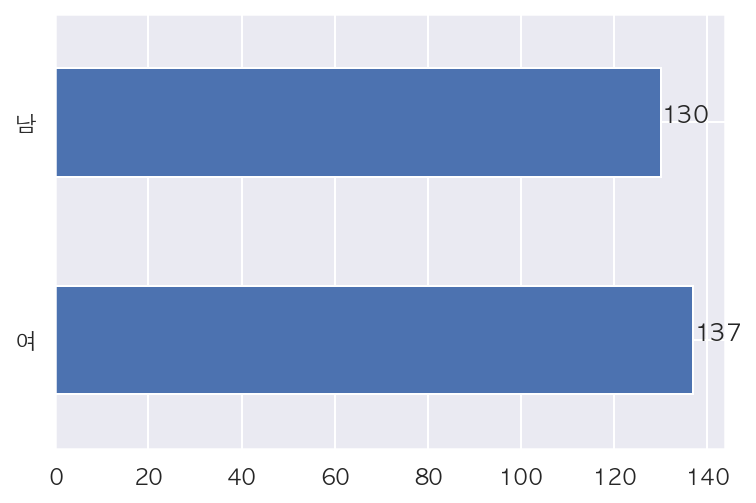

In [41]:
gender_count = df["성별"].value_counts()
g = gender_count.plot.barh()
for i, val in enumerate(gender_count):
    g.text(x=val, y=i, s=val)

## 연령

In [42]:
df["출생년"] = df["성별(출생년)"].map(lambda x : 
                  x.split("(")[-1].replace("'", "").replace("‵", "").replace(")", "").strip())
df.loc[df["출생년"].astype(int) > 20, "출생년"] = "19" + df["출생년"]
df.loc[df["출생년"].astype(int) <= 20, "출생년"] = "20" + df["출생년"]

In [43]:
df["출생년"].value_counts().head()

1969    13
1992    10
1968     8
1982     8
1972     8
Name: 출생년, dtype: int64

In [44]:
df["출생년"] = df["출생년"].astype(int)
df["나이"] = 2020 - df["출생년"]

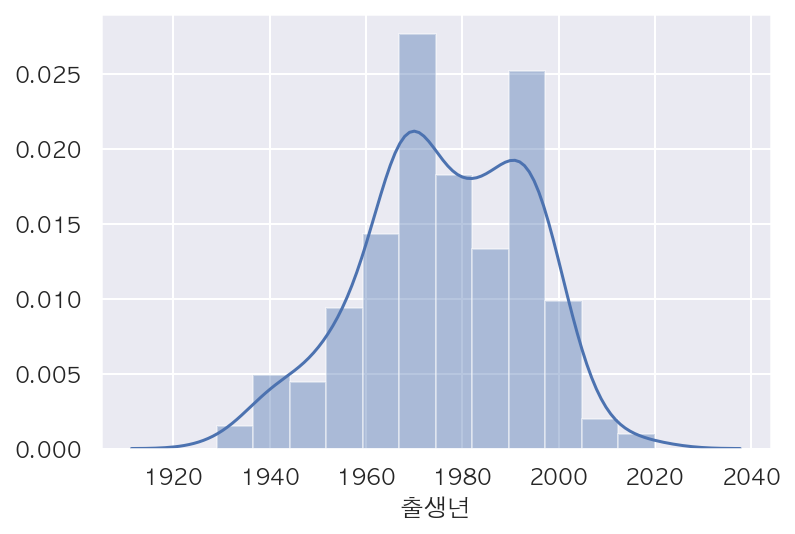

In [45]:
sns.distplot(df["출생년"])

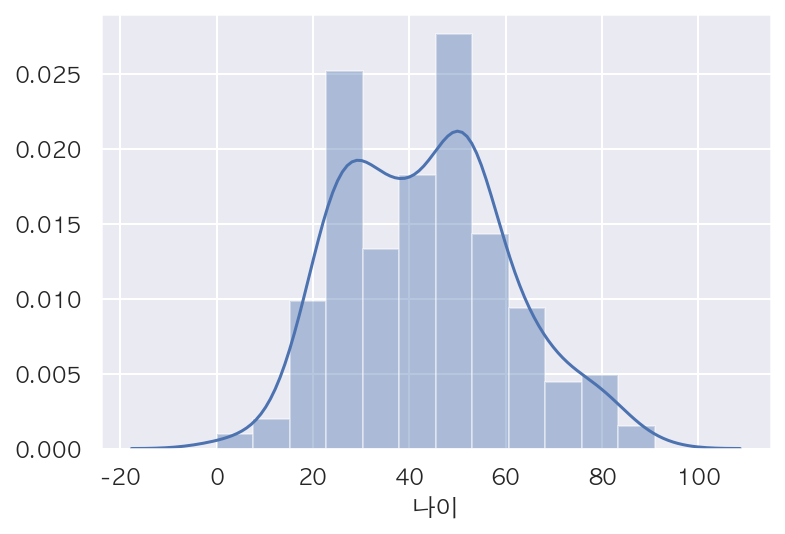

In [46]:
sns.distplot(df["나이"])

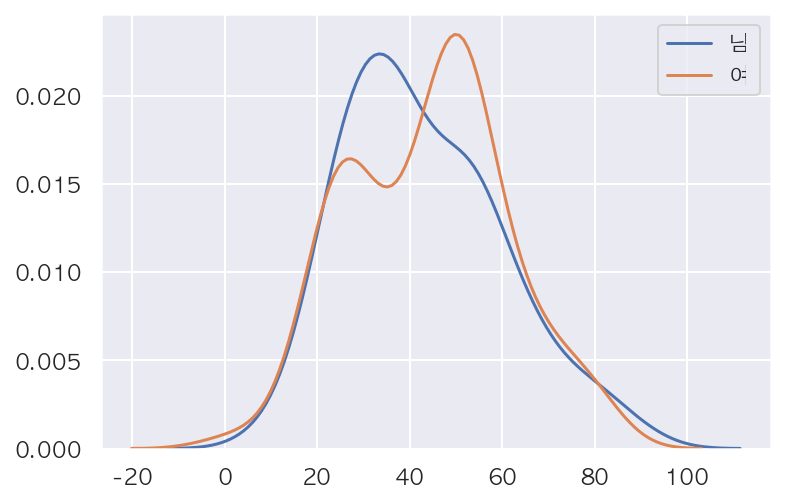

In [53]:
male_age = df.loc[df["성별"] == "남", "나이"]
female_age = df.loc[df["성별"] == "여", "나이"]
sns.kdeplot(male_age, label="남")
sns.kdeplot(female_age, label="여")